In [1]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2



In [2]:
# choose based on run in acadia or home computer
home_dir = "/mnt/labNAS/"
# home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# add paths to metadata
# output of mean_subtract_individuals.py
for i in range(metadata.shape[0]):
    b_path = in_path+"norm_subtracted/p05_mean_subtracted/"+metadata.loc[i, 'brain']+"p05_norm_subtracted.tif"

    metadata.loc[i,"path"] = b_path

# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS"]


In [3]:
# load images
images = []
for i in range(metadata.shape[0]):
    images.append(tf.imread(metadata.loc[i,"path"]))


In [4]:
# load masks for each individually aligned brain
from time import time
start = time()
# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    area_masks = []
    print("working on", area)
    for i in range(metadata.shape[0]):
        print("\t", metadata.loc[i,"brain"])
        save_folder = in_path+"masks/"+metadata.loc[i,"brain"]+"_masks/"
        with open(save_folder+metadata.loc[i,"brain"]+"_"+area+".npy", "rb") as f:
            area_masks.append(np.load(f))
        
    mask_dict[area] = area_masks

# for area in mask_dict:
#     print(area, ": \t", len(mask_dict[area]))

end = time()
print("took", end-start, "seconds to load")

working on grey
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on CTX
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on ACAc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on au

# quantify integrated fluorescence




## OMC

In [5]:
for i in range(metadata.shape[0]):
    print(metadata.loc[i,"brain"])
    print("image shape:", images[i].shape)
    print("mask shape: ", mask_dict['OMCc'][i].shape)
    print("\n")
    # print(images[i].shape)

ACC_MMus_230403_b1
image shape: (265, 640, 499)
mask shape:  (265, 640, 499)


ACC_MMus_230404_b2
image shape: (265, 640, 499)
mask shape:  (265, 640, 499)


ACC_STeg_230308_b1
image shape: (270, 640, 499)
mask shape:  (270, 640, 499)


ACC_STeg_230322_b2
image shape: (270, 640, 499)
mask shape:  (270, 640, 499)


ACC_STeg_230501_b3
image shape: (265, 640, 499)
mask shape:  (265, 640, 499)


OMC_MMus_220119_b0
image shape: (280, 605, 464)
mask shape:  (280, 605, 464)


OMC_MMus_220303_b1
image shape: (212, 640, 499)
mask shape:  (212, 640, 499)


OMC_MMus_220324_b2
image shape: (280, 640, 499)
mask shape:  (280, 640, 499)


OMC_STeg_220208_b0
image shape: (280, 640, 499)
mask shape:  (280, 640, 499)


OMC_STeg_220411_b1
image shape: (280, 640, 499)
mask shape:  (280, 640, 499)


OMC_STeg_220429_b2
image shape: (201, 675, 499)
mask shape:  (201, 675, 499)




In [6]:
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]


In [7]:
omc_fluor = calc_fluor_individ(images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,29166.78509,12377.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,5767.51991,25721.50,OMC_MMus_220119_b0,MMus,OMC
2,aud,502.79654,5696.68,OMC_MMus_220119_b0,MMus,OMC
3,AMY,328.82326,3558.56,OMC_MMus_220119_b0,MMus,OMC
4,TH,11597.45938,19754.86,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,188.98122,1055.24,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1395.09054,5601.28,OMC_STeg_220429_b2,STeg,OMC
63,PG,102.14402,631.38,OMC_STeg_220429_b2,STeg,OMC
64,PAG,1133.98031,3871.92,OMC_STeg_220429_b2,STeg,OMC


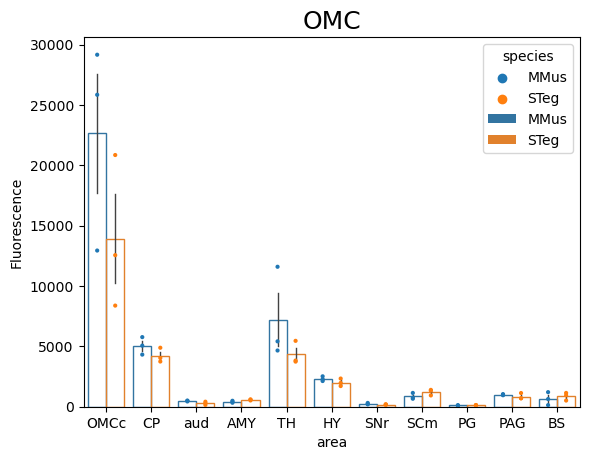

In [8]:
# make dot plot
dot_bar_plot(omc_fluor, title="OMC", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

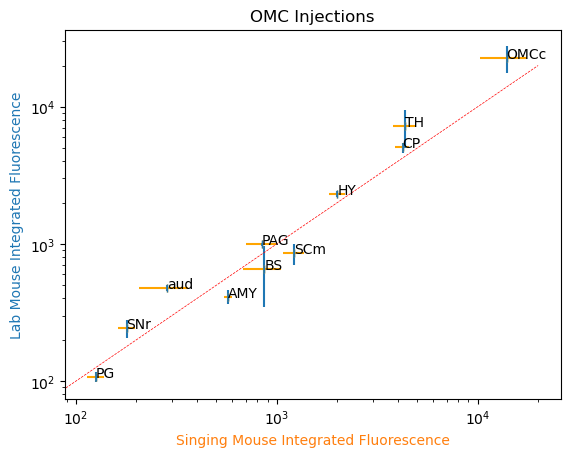

In [9]:
stvmm_area_scatter(omc_fluor, title="OMC Injections")
plt.show()

## ACC

In [12]:
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")


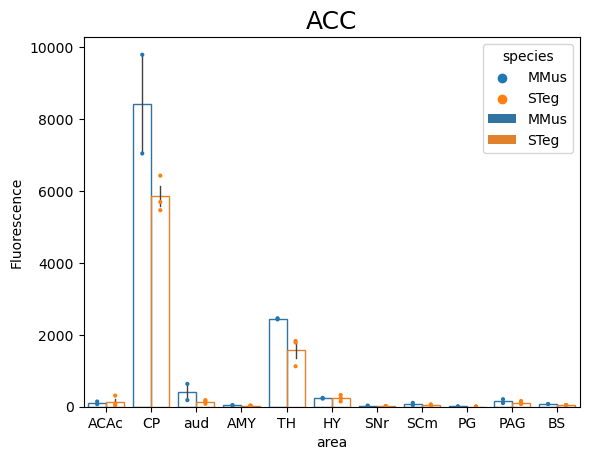

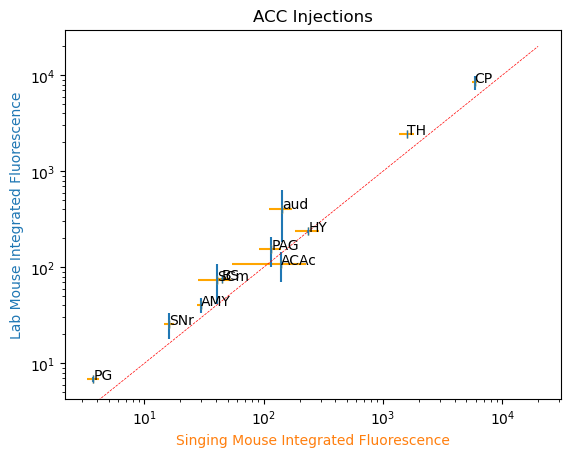

In [13]:
# make dot plot
dot_bar_plot(acc_fluor, title="ACC", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC Injections")
plt.show()